In [ ]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/gdrive")
pd.set_option('display.max_columns', None)  # Display all columns

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/gdrive


In [ ]:
#https://www.kaggle.com/datasets/dheemanthbhat/stack-overflow-annual-developer-survey-2022
path = "./gdrive/MyDrive/survey_results_public.csv" #stack overflow survey dataset - kaggle
db = pd.read_csv(path)
db.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,NaN,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom

In [ ]:
db.shape

(73268, 79)

In [ ]:
#Taking only the interested fields
df = db[["ResponseId","MainBranch","Employment","RemoteWork","EdLevel","LearnCode","LearnCodeOnline",	"LearnCodeCoursesCert","YearsCode","YearsCodePro","DevType","OrgSize","Country","Currency","CompTotal","CompFreq","LanguageHaveWorkedWith","Age","Gender","Trans","Sexuality","Ethnicity"]]
df.dtypes

ResponseId                  int64
MainBranch                 object
Employment                 object
RemoteWork                 object
EdLevel                    object
LearnCode                  object
LearnCodeOnline            object
LearnCodeCoursesCert       object
YearsCode                  object
YearsCodePro               object
DevType                    object
OrgSize                    object
Country                    object
Currency                   object
CompTotal                 float64
CompFreq                   object
LanguageHaveWorkedWith     object
Age                        object
Gender                     object
Trans                      object
Sexuality                  object
Ethnicity                  object
dtype: object

In [ ]:
YearsCode = pd.to_numeric(df['YearsCode'], errors = 'coerce', downcast = 'float')
df['YearsCode'] = YearsCode
YearsCodePro = pd.to_numeric(df['YearsCodePro'], errors = 'coerce', downcast = 'float')
df['YearsCodePro'] = YearsCodePro

#this notebook is for demonstrating sql usage, so for the convenience null values can be simply dropped rather than estimating values for them,
#one can find an example workbook for managing null values in repository "XXX"

#df.isnull().sum()
#df = df.dropna(axis = 0)
#df.isnull().sum()

df.dtypes

ResponseId                  int64
MainBranch                 object
Employment                 object
RemoteWork                 object
EdLevel                    object
LearnCode                  object
LearnCodeOnline            object
LearnCodeCoursesCert       object
YearsCode                 float32
YearsCodePro              float32
DevType                    object
OrgSize                    object
Country                    object
Currency                   object
CompTotal                 float64
CompFreq                   object
LanguageHaveWorkedWith     object
Age                        object
Gender                     object
Trans                      object
Sexuality                  object
Ethnicity                  object
dtype: object

In [ ]:

df.shape
#df["CompTotal"].describe() #There are obviously outliers in terms of compTotal - we should carry some data preprocessing

(73268, 22)

In [ ]:
#Connecting to SQLite3
conn = sqlite3.connect('database.db')

#Generating the on hand dataframe to sqlite table
df.to_sql('db_so', conn, if_exists='replace', index=False)

#66633 is the number of rows inserted into the SQLite

73268

In [ ]:
#To see how the sqlite table looks like
query_head = "SELECT * FROM db_so LIMIT 10;"
result_head = pd.read_sql_query(query_head, conn)
result_head

,ResponseId,MainBranch,Employment,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Age,Gender,Trans,Sexuality,Ethnicity
0,1,None of these,None,None,None,None,None,None,NaN,NaN,None,None,None,None,NaN,None,None,None,None,None,None,None
1,2,I am a developer by profession,"Employed, full-time",Fully remote,None,None,None,None,NaN,NaN,None,None,Canada,CAD\tCanadian dollar,NaN,None,JavaScript;TypeScript,None,None,None,None,None
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,None,14.0,5.0,Data scientist or machine learning specialist;...,20 to 99 employees,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,25-34 years old,Man,No,Bisexual,White
3,4,I am a developer by profession,"Employed, full-time",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",None,None,20.0,17.0,"Developer, full-stack",100 to 499 employees,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,35-44 years old,Man,No,Straight / Heterosexual,White
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,None,8.0,3.0,"Developer, front-end;Developer, full-stack;Dev...",20 to 99 employees,United States of America,USD\tUnited States dollar,NaN,None,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,25-34 years old,None,None,None,None
5,6,"I am not primarily a developer, but I write co...","Student, full-time",None,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;School (i.e., Universit...",None,None,15.0,NaN,None,None,Germany,None,NaN,None,C++;Lua,25-34 years old,"Or, in your own words:","Or, in your own words:",Prefer to self-describe:,"Or, in your own words:"
6,7,I code primarily as a hobby,"Student, part-time",None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Stack Overflow;Video-based Online Courses,None,3.0,NaN,None,None,India,None,NaN,None,C++;HTML/CSS;JavaScript;PHP;Python;TypeScript,Under 18 years old,Man,No,None,Indian
7,8,I am a developer by profession,"Not employed, but looking for work",None,Some college/university study without earning ...,Online Courses or Certification,None,Coursera;Udemy,1.0,NaN,"Developer, full-stack;Student",None,India,None,NaN,None,C;C++;HTML/CSS;Java;JavaScript;SQL,18-24 years old,Man,No,Straight / Heterosexual,Indian
8,9,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Coding Bootcamp,None,None,6.0,6.0,"Developer, back-end",I don’t know,Netherlands,EUR European Euro,46000.0,Yearly,None,25-34 years old,Woman,No,Prefer to self-describe:,European
9,10,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Fully remote,Some college/university study without earning ...,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,None,37.0,30.0,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",Croatia,HRK\tCroatian kuna,NaN,None,Delphi;Java;Swift,45-54 years old,Woman,No,Straight / Heterosexual,White;European


In [ ]:
query_branch = "SELECT DISTINCT MainBranch, (COUNT (ResponseId)) FROM db_so GROUP BY 1 ORDER BY 2 DESC;"
result_branch = pd.read_sql_query(query_branch, conn)
result_branch

,MainBranch,(COUNT (ResponseId))
0,I am a developer by profession,53507
1,I am learning to code,6309
2,"I am not primarily a developer, but I write co...",5794
3,I code primarily as a hobby,4865
4,None of these,1497
5,"I used to be a developer by profession, but no...",1296


In [ ]:
#Moving on with professional developers only

query_curr_dev = """
SELECT *,
    RunningTotal/Total as x
FROM (
    SELECT *,
        CAST(SUM(count) OVER (ORDER BY count ROWS BETWEEN CURRENT ROW AND UNBOUNDED FOLLOWING) AS REAL) AS RunningTotal,
        CAST(SUM(count) OVER (ORDER BY count ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS REAL) AS Total
    FROM (
        SELECT DISTINCT Currency,
            COUNT(ResponseId) AS count
        FROM db_so
        GROUP BY Currency
        HAVING Currency != 'None' AND MainBranch = 'I am a developer by profession'
    ) AS subquery
) AS subs
WHERE x <= 0.80
ORDER BY count DESC;
"""
result_curr_dev = pd.read_sql_query(query_curr_dev, conn)
result_curr_dev


,Currency,count,RunningTotal,Total,x
0,EUR European Euro,12634,12634.0,47723.0,0.264736
1,USD\tUnited States dollar,12346,24980.0,47723.0,0.523437
2,INR\tIndian rupee,4229,29209.0,47723.0,0.612053
3,CAD\tCanadian dollar,1847,31056.0,47723.0,0.650755
4,BRL\tBrazilian real,1449,32505.0,47723.0,0.681118
5,PLN\tPolish zloty,1145,33650.0,47723.0,0.705111
6,AUD\tAustralian dollar,1109,34759.0,47723.0,0.728349
7,SEK\tSwedish krona,781,35540.0,47723.0,0.744714
8,RUB\tRussian ruble,736,36276.0,47723.0,0.760137
9,CHF\tSwiss franc,668,36944.0,47723.0,0.774134


In [ ]:
pop_currencies = result_curr_dev["Currency"] #result is also a dataframe
abb_curr = [string[:3] for string in pop_currencies]
abb_curr

['EUR',
 'USD',
 'INR',
 'CAD',
 'BRL',
 'PLN',
 'AUD',
 'SEK',
 'RUB',
 'CHF',
 'TRY',
 'ILS']

In [ ]:
#converting currency data type from object to string so that we can take the left three charachters
df["Currency"] = df["Currency"].astype(str)
df["Currency_v2"] = df["Currency"].apply(lambda string: string[:3])
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Age,Gender,Trans,Sexuality,Ethnicity,Currency_v2
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1,2,I am a developer by profession,"Employed, full-time",Fully remote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,NaN,NaN,NaN,NaN,NaN,CAD
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14.0,5.0,Data scientist or machine learning specialist;...,20 to 99 employees,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,25-34 years old,Man,No,Bisexual,White,GBP
3,4,I am a developer by profession,"Employed, full-time",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20.0,17.0,"Developer, full-stack",100 to 499 employees,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,35-44 years old,Man,No,Straight / Heterosexual,White,ILS
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8.0,3.0,"Developer, front-end;Developer, full-stack;Dev...",20 to 99 employees,United States of America,USD\tUnited States dollar,NaN,NaN,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,25-34 years old,NaN,NaN,NaN,NaN,USD


In [ ]:
#CONVERTING NOT ALL CURRENCIES BUT INCLUDING 80% OF DATA VOLUME

df2 = df.loc[df["MainBranch"] == 'I am a developer by profession']
df2.shape

(53507, 23)

In [ ]:
df2 = df2.loc[df["Currency_v2"].isin(abb_curr)]
df2.shape

(34717, 23)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [ ]:
#converting compTotals to dollars for fair comparison
#!ls /content/gdrive/MyDrive/

#downloading currency csv
path_cur = "/content/gdrive/MyDrive/CurrencyRatesToDollars.xlsx" #stack overflow survey dataset - kaggle
db_cur = pd.read_excel(path_cur)
db_cur.head()

#rate represents how much dollars X currency equals to

,Abb,Currency,Rate
0,EUR,Euro,1.1240
1,AUD,Australian Dollar,0.6850
2,CAD,Canadian Dollar,0.7560
3,CHF,Swiss Franc,1.1595
4,INR,Indian Rupee,0.0121


In [ ]:
#IF YOU WANT TO SIGN-UP FOR A FREE OR PAID API PROVIDERS, CURRENCY RATES CAN BE PULLED EVEN EASIER

"""
#pip install requests

import requests

# Make a GET request to the API endpoint
response = requests.get("https://api.exchangeratesapi.io/latest")

# Check if the request was successful
if response.status_code == 200:
    # Extract the JSON data from the response
    data = response.json()

    # Access the rates dictionary in the data
    #rates = data['rates']

    # Print the currency rates
    #for currency, rate in rates.items():
    #    print(f"{currency}: {rate}")
else:
    print("Error occurred while fetching data.")
"""

In [ ]:
#db_cur = (db_cur[['Abb','Rate']]).to_dict()
# Convert 'Abb' and 'Rate' columns of db_cur to a dictionary
db_cur_dict = db_cur.set_index('Abb')['Rate'].to_dict()

# Map values from db_cur_dict based on 'Currency_v2' column in df2
df2['FairCoef'] = df2['Currency_v2'].map(db_cur_dict)
df2['FairCompTotal'] = df2['CompTotal']*df2['FairCoef']
df2.head()

#df2['CompTotalFair'] = df2['Currency_v2'].map(db_cur)

,ResponseId,MainBranch,Employment,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Age,Gender,Trans,Sexuality,Ethnicity,Currency_v2,FairCoef,FairCompTotal
1,2,I am a developer by profession,"Employed, full-time",Fully remote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,NaN,NaN,NaN,NaN,NaN,CAD,0.75600,NaN
3,4,I am a developer by profession,"Employed, full-time",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20.0,17.0,"Developer, full-stack",100 to 499 employees,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,35-44 years old,Man,No,Straight / Heterosexual,White,ILS,0.27701,16620.6
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8.0,3.0,"Developer, front-end;Developer, full-stack;Dev...",20 to 99 employees,United States of America,USD\tUnited States dollar,NaN,NaN,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,25-34 years old,NaN,NaN,NaN,NaN,USD,1.00000,NaN
8,9,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Coding Bootcamp,NaN,NaN,6.0,6.0,"Developer, back-end",I don’t know,Netherlands,EUR European Euro,46000.0,Yearly,NaN,25-34 years old,Woman,No,Prefer to self-describe:,European,EUR,1.12400,51704.0
12,13,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","School (i.e., University, College, etc)",NaN,NaN,12.0,5.0,"Developer, full-stack",2 to 9 employees,United States of America,USD\tUnited States dollar,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,25-34 years old,Man,No,Straight / Heterosexual,White,USD,1.00000,65000.0


In [ ]:
#Monthly Yearly değişimi de yapmak lazım.

# Create a new column 'adjustedCompTotal' by applying the logic
df2['adjustedCompTotal'] = df2.apply(lambda row: row['FairCompTotal'] * 12 if row['CompFreq'] == 'Monthly' else row['CompTotal'], axis=1)

# Print the updated DataFrame
df2.head()


,ResponseId,MainBranch,Employment,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Age,Gender,Trans,Sexuality,Ethnicity,Currency_v2,FairCoef,FairCompTotal,adjustedCompTotal
1,2,I am a developer by profession,"Employed, full-time",Fully remote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,NaN,NaN,NaN,NaN,NaN,CAD,0.75600,NaN,NaN
3,4,I am a developer by profession,"Employed, full-time",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20.0,17.0,"Developer, full-stack",100 to 499 employees,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,35-44 years old,Man,No,Straight / Heterosexual,White,ILS,0.27701,16620.6,199447.2
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8.0,3.0,"Developer, front-end;Developer, full-stack;Dev...",20 to 99 employees,United States of America,USD\tUnited States dollar,NaN,NaN,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,25-34 years old,NaN,NaN,NaN,NaN,USD,1.00000,NaN,NaN
8,9,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Coding Bootcamp,NaN,NaN,6.0,6.0,"Developer, back-end",I don’t know,Netherlands,EUR European Euro,46000.0,Yearly,NaN,25-34 years old,Woman,No,Prefer to self-describe:,European,EUR,1.12400,51704.0,46000.0
12,13,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","School (i.e., University, College, etc)",NaN,NaN,12.0,5.0,"Developer, full-stack",2 to 9 employees,United States of America,USD\tUnited States dollar,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,25-34 years old,Man,No,Straight / Heterosexual,White,USD,1.00000,65000.0,65000.0


In [ ]:
df2.shape

(34717, 26)

In [ ]:
#WE ARE INTERESTED IN PROFESSIONAL DEVELOPERS' COMPENSATION, SO ELIMINATING OUTLIERS IN A MORE SEPECIFIED DATASET MAKES MORE SENSE.

#First, convert NaN values to 0 as they are misleading in terms of computations
df2['adjustedCompTotal'] = df2['adjustedCompTotal'].fillna(0)

inlier = df2.copy()
Q1r = np.percentile(inlier["adjustedCompTotal"], 25, interpolation='midpoint')
Q3r = np.percentile(inlier["adjustedCompTotal"], 75, interpolation='midpoint')
IQRr = Q3r - Q1r

upperscore_r = Q3r + 1.5 * IQRr
lowerscore_r = Q1r - 1.5 * IQRr

#print(Q1r)
#print(Q3r)
#print(upperscore_r)
#print(lowerscore_r)
inlier.head()
inlier = inlier[(inlier["adjustedCompTotal"] >= lowerscore_r) & (inlier["adjustedCompTotal"] <= upperscore_r)]
inlier.describe()

#YearsCode(Pro) values also have outliers, we can easily conclude that by looking ar the quartile ranges.
#One can do the same above for other field, moving on.

#We can see that 2867 of records are eliminated.

,ResponseId,YearsCode,YearsCodePro,CompTotal,FairCoef,FairCompTotal,adjustedCompTotal
count,31850.000000,31555.000000,30517.000000,2.393000e+04,31850.000000,23930.000000,31850.000000
mean,35799.486531,14.851783,10.471967,8.731666e+04,0.821868,72815.434314,68240.193795
std,21089.977291,9.738509,8.563346,1.014810e+05,0.400767,69506.461741,68219.125363
min,2.000000,1.000000,1.000000,0.000000e+00,0.011100,0.000000,0.000000
25%,17142.250000,8.000000,4.000000,1.600000e+04,0.685000,4911.725000,0.000000
50%,36790.000000,12.000000,8.000000,7.000000e+04,1.000000,62944.000000,53280.000000
75%,53335.750000,20.000000,15.000000,1.300000e+05,1.124000,116000.000000,108631.250000
max,73265.000000,50.000000,50.000000,2.100000e+06,1.159500,337200.000000,317000.000000


<Axes: >

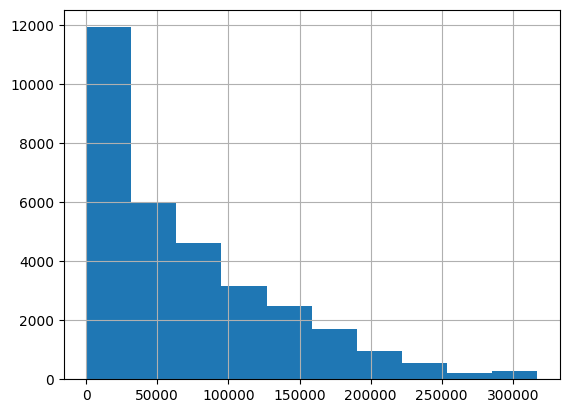

In [ ]:
inlier['adjustedCompTotal'].hist() #her şeyi dolara çevirip bu grafiği çizdireceğim - foodstylestaki mapping işe yarayabilir. güncel kurları da apiden alsam aşırı havalı olur.

In [ ]:
inlier.isnull().sum()
full_comp = inlier.copy()
full_comp = full_comp[(full_comp["adjustedCompTotal"] != 0)]
full_comp.shape
#df = df.dropna(axis = 0)
#df.isnull().sum()

(23871, 26)

<Axes: >

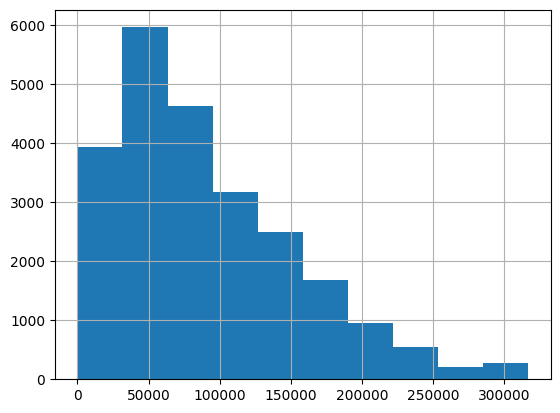

In [ ]:
full_comp['adjustedCompTotal'].hist() #her şeyi dolara çevirip bu grafiği çizdireceğim - foodstylestaki mapping işe yarayabilir. güncel kurları da apiden alsam aşırı havalı olur.

#MAIN SQL SNIPPETS

In [ ]:
#Connecting to SQLite3
conn = sqlite3.connect('database.db')

#Generating the on hand dataframe to sqlite table
full_comp.to_sql('final_db', conn, if_exists='replace', index=False)

#23871 is the number of rows inserted into the SQLite

23871

### TOP 10 COUNTRIES BY PROFESSIONAL DEVELOPER COUNT AND RELATIVE EXPERIENCES AVERAGES

In [ ]:
#There are so many different combinations of country and currency, without any branch or currency filter. There are people who are paid with Albanian lek in China and people paid with Arabian dirham in US.
#Then we can focus on a country or eliminate according to occurence count. - We can see there are outliers, having only one instance of specific country, currency combination.

#Selecting top 10 countries and used currencies for payments of professional developers.
query_top10 = """
SELECT DISTINCT Country,	Currency, COUNT(*), MIN(adjustedCompTotal), AVG(adjustedCompTotal), MAX(adjustedCompTotal)
FROM final_db
GROUP BY 1,2
ORDER BY 3 DESC
LIMIT 10
"""
##for 12 months, realistic compansation would be more than 20000 units
result_top10 = pd.read_sql_query(query_top10, conn)
result_top10


,Country,Currency,COUNT(*),MIN(adjustedCompTotal),AVG(adjustedCompTotal),MAX(adjustedCompTotal)
0,United States of America,USD\tUnited States dollar,7362,33.00000,142212.634067,317000.0
1,Germany,EUR European Euro,2473,13.48800,69850.742243,300000.0
2,Canada,CAD\tCanadian dollar,1288,41.00000,121060.787311,310000.0
3,France,EUR European Euro,1202,32.00000,54295.176213,300000.0
4,Brazil,BRL\tBrazilian real,1046,20.20824,56331.261229,316000.0
5,Spain,EUR European Euro,834,40.00000,49828.117871,310224.0
6,Netherlands,EUR European Euro,803,145.00000,69411.868862,275000.0
7,Poland,PLN\tPolish zloty,792,1250.00000,67308.686088,312000.0
8,India,INR\tIndian rupee,749,0.29040,44156.216977,312000.0
9,Australia,AUD\tAustralian dollar,691,204.00000,128696.197453,310000.0


#GENDER DEFINITIONS AND CATEGORIZATIONS OF PARTICIPANTS

In [ ]:
query_gender = """
SELECT DISTINCT Gender,
CASE Gender
WHEN 'Man' THEN 'Man'
WHEN 'Woman' THEN 'Woman'
WHEN 'Prefer not to say' THEN 'PNTS'
ELSE 'NonBinary/GenderQueer'
END AS GenderCategory,
COUNT (ResponseId) AS ResponseCount
FROM final_db
GROUP BY Gender, GenderCategory
ORDER BY ResponseCount DESC;
"""
result_gender = pd.read_sql_query(query_gender, conn)
result_gender #16 unique gender options - can be divided to 4 main categories --> Man, Woman, PNTS, NonBinary/GenderQueer

,Gender,GenderCategory,ResponseCount
0,Man,Man,21969
1,Woman,Woman,1113
2,"Non-binary, genderqueer, or gender non-conforming",NonBinary/GenderQueer,213
3,Prefer not to say,PNTS,207
4,"Man;Non-binary, genderqueer, or gender non-con...",NonBinary/GenderQueer,86
5,None,NonBinary/GenderQueer,84
6,"Or, in your own words:",NonBinary/GenderQueer,75
7,"Woman;Non-binary, genderqueer, or gender non-c...",NonBinary/GenderQueer,54
8,"Man;Or, in your own words:",NonBinary/GenderQueer,44
9,"Or, in your own words:;Non-binary, genderqueer...",NonBinary/GenderQueer,7


### MEN - WOMEN COMPARISON OF COMPANSATION AND EXPERIENCE LEVELS GROUPED BY GENDER IN TOP 10 COUNTRIES

In [ ]:
query_10_g ="""
SELECT Country, Gender, COUNT(DISTINCT ResponseId), AVG(YearsCode), AVG(YearsCodePro), MIN(adjustedCompTotal), AVG(adjustedCompTotal), MAX(adjustedCompTotal)
FROM (
    SELECT Country, Gender, ResponseId, YearsCode, YearsCodePro,
           COUNT(ResponseID) OVER (PARTITION BY Country) AS country_count, adjustedCompTotal
    FROM final_db
) AS subquery
WHERE Gender IN ('Man','Woman')
GROUP BY Country, Gender
ORDER BY country_count desc, Country, Gender
LIMIT 20;
"""

result_10_g = pd.read_sql_query(query_10_g, conn)
result_10_g


,Country,Gender,COUNT(DISTINCT ResponseId),AVG(YearsCode),AVG(YearsCodePro),MIN(adjustedCompTotal),AVG(adjustedCompTotal),MAX(adjustedCompTotal)
0,United States of America,Man,6601,16.763944,12.179875,33.00000,143217.344796,316000.0
1,United States of America,Woman,440,13.059497,9.618357,12.00000,131868.372727,317000.0
2,Germany,Man,2309,15.797743,9.973731,80.00000,70533.428476,300000.0
3,Germany,Woman,95,12.189474,7.692308,18883.20000,60409.491537,150000.0
4,Canada,Man,1195,16.075567,11.045299,41.00000,122411.631223,310000.0
5,Canada,Woman,66,13.606061,9.435484,13608.00000,111040.693697,300000.0
6,France,Man,1123,13.849866,8.986175,32.00000,55405.678461,300000.0
7,France,Woman,41,8.707317,5.365854,14836.80000,43358.150244,76000.0
8,Brazil,Man,1051,12.219981,9.073293,150.00000,59341.778027,316000.0
9,Brazil,Woman,65,9.126984,6.500000,26.94432,50504.958695,240000.0


### COMPARISON OF EUROPEAN - MIDDLE EASTERN INCLUDING ETHNITICITES - ONE RECORD CAN INCLUDE BOTH

In [ ]:
query_middle_eastern = """
SELECT Country, COUNT(DISTINCT ResponseId), AVG(YearsCode), AVG(YearsCodePro), MIN(adjustedCompTotal), AVG(adjustedCompTotal), MAX(adjustedCompTotal)
FROM (
    SELECT Country, Gender, ResponseId, YearsCode, YearsCodePro, Ethnicity,
           COUNT(ResponseID) OVER (PARTITION BY Country) AS country_count, adjustedCompTotal
    FROM final_db
) AS subquery
WHERE Ethnicity LIKE '%Middle Eastern%'
GROUP BY Country
ORDER BY country_count desc, Country
LIMIT 10;
"""

result_middle_eastern = pd.read_sql_query(query_middle_eastern, conn)
result_middle_eastern

,Country,COUNT(DISTINCT ResponseId),AVG(YearsCode),AVG(YearsCodePro),MIN(adjustedCompTotal),AVG(adjustedCompTotal),MAX(adjustedCompTotal)
0,United States of America,116,14.810345,10.149123,180.00,149501.077586,315000.0
1,Germany,74,12.378378,7.554054,135.00,66582.354054,140000.0
2,Canada,48,13.062500,8.212766,60000.00,139315.375000,300000.0
3,France,13,10.076923,5.615385,13488.00,61478.286769,250000.0
4,Brazil,3,13.333333,10.000000,40416.48,76240.160000,102000.0
5,Poland,5,13.800000,13.000000,4800.00,49110.980000,106000.0
6,Spain,6,20.166667,15.833333,40464.00,99968.000000,200000.0
7,Netherlands,37,11.945946,8.416667,200.00,75036.951351,180000.0
8,India,2,10.000000,6.000000,10164.00,20691.000000,31218.0
9,Australia,14,13.714286,8.928571,2500.00,115285.714286,175000.0


In [ ]:
query_european = """
SELECT Country, COUNT(DISTINCT ResponseId), AVG(YearsCode), AVG(YearsCodePro), MIN(adjustedCompTotal), AVG(adjustedCompTotal), MAX(adjustedCompTotal)
FROM (
    SELECT Country, Gender, ResponseId, YearsCode, YearsCodePro, Ethnicity,
           COUNT(ResponseID) OVER (PARTITION BY Country) AS country_count, adjustedCompTotal
    FROM final_db
) AS subquery
WHERE Ethnicity LIKE '%European%'
GROUP BY Country
ORDER BY country_count desc, Country
LIMIT 10;
"""

result_european = pd.read_sql_query(query_european, conn)
result_european

,Country,COUNT(DISTINCT ResponseId),AVG(YearsCode),AVG(YearsCodePro),MIN(adjustedCompTotal),AVG(adjustedCompTotal),MAX(adjustedCompTotal)
0,United States of America,557,19.307832,14.299445,760.00000,149454.192101,315000.0
1,Germany,2044,16.045521,10.079437,210.00000,69352.592368,300000.0
2,Canada,217,18.462963,12.924528,41.00000,119589.901382,260000.0
3,France,970,14.149068,9.119022,36.00000,55135.439282,300000.0
4,Brazil,69,14.253731,10.686567,2404.78056,64135.166428,300000.0
5,Poland,739,12.310298,8.086280,1250.00000,69235.490827,312000.0
6,Spain,666,13.812689,9.681458,40.00000,49809.732000,310224.0
7,Netherlands,616,15.843902,10.740369,145.00000,66500.788234,260000.0
8,India,1,38.000000,27.000000,5000.00000,5000.000000,5000.0
9,Australia,170,19.721893,14.982143,600.00000,130554.267176,300000.0



*Alhtough there is little data, Middle Eastern woman are paid considerably less than other gender-ethnicity combinations*

### TOTAL COMPARISON WITH ON TWO OF GENDER AND ETHNICITY FILTERS BASED ON TOP 5 COUNTRIES (according to total participant count)

In [ ]:
query_total_comparison = """
SELECT Country, s.GenderCategory, s.Ethnicity, COUNT(DISTINCT s.ResponseId), AVG(s.YearsCode), AVG(s.YearsCodePro), MIN(s.adjustedCompTotal), AVG(s.adjustedCompTotal), MAX(s.adjustedCompTotal)
FROM (
    SELECT Country,
    COUNT(ResponseID) OVER (PARTITION BY Country) AS country_count,
        CASE Gender
            WHEN 'Man' THEN 'Man'
            WHEN 'Woman' THEN 'Woman'
            WHEN 'Prefer not to say' THEN 'PNTS'
            ELSE 'NonBinary/GenderQueer'
        END AS GenderCategory,
        Ethnicity, ResponseId, YearsCode, YearsCodePro, adjustedCompTotal
    FROM final_db
    WHERE Country IN (
        SELECT Country
        FROM final_db
        GROUP BY Country
        ORDER BY COUNT(DISTINCT ResponseId) DESC
        LIMIT 5
    )
) AS s
WHERE (Ethnicity LIKE 'Middle Eastern' OR Ethnicity LIKE 'European')
GROUP BY Country, s.GenderCategory, s.Ethnicity
ORDER BY country_count DESC, COUNT(DISTINCT s.ResponseId) DESC, Country, s.GenderCategory, s.Ethnicity;
"""

result_total_comparison = pd.read_sql_query(query_total_comparison, conn)
result_total_comparison


,Country,GenderCategory,Ethnicity,COUNT(DISTINCT s.ResponseId),AVG(s.YearsCode),AVG(s.YearsCodePro),MIN(s.adjustedCompTotal),AVG(s.adjustedCompTotal),MAX(s.adjustedCompTotal)
0,United States of America,Man,European,82,19.987654,15.275000,24000.000,163000.000000,300000.0
1,United States of America,Man,Middle Eastern,36,12.944444,8.705882,1680.000,153988.000000,300000.0
2,United States of America,Woman,European,9,14.555556,11.500000,81600.000,146955.555556,227000.0
3,United States of America,NonBinary/GenderQueer,European,5,22.250000,13.500000,75000.000,132000.000000,200000.0
4,United States of America,PNTS,European,3,14.666667,9.000000,84000.000,141000.000000,201000.0
5,United States of America,Woman,Middle Eastern,1,7.000000,5.000000,180.000,180.000000,180.0
6,Germany,Man,European,1286,16.702177,10.755361,2660.000,70792.075882,280000.0
7,Germany,Man,Middle Eastern,43,11.906977,7.558140,135.000,65587.362791,128000.0
8,Germany,Woman,European,42,13.428571,9.275000,18883.200,56119.099429,100000.0
9,Germany,NonBinary/GenderQueer,European,21,15.333333,8.428571,26976.000,59604.465524,110000.0


In [ ]:
#SQL Code for BigQuery or SQLite version  3.8.3 and after
"""
WITH country_counts AS (
    SELECT Country, COUNT(DISTINCT ResponseId) AS country_count
    FROM db_so
    WHERE MainBranch = 'I am a developer by profession'
    AND Currency != 'None'
    AND CompTotal >= 20000
    GROUP BY Country
)

SELECT c.Country, s.GenderCategory, s.Ethnicity, COUNT(DISTINCT s.ResponseId), AVG(s.YearsCode), AVG(s.YearsCodePro), MIN(s.CompTotal), AVG(s.CompTotal), MAX(s.CompTotal)
FROM (
    SELECT Country,
        CASE Gender
            WHEN 'Man' THEN 'Man'
            WHEN 'Woman' THEN 'Woman'
            WHEN 'Prefer not to say' THEN 'PNTS'
            ELSE 'NonBinary/GenderQueer'
        END AS GenderCategory,
        Ethnicity, ResponseId, YearsCode, YearsCodePro, CompTotal
    FROM db_so
    WHERE MainBranch = 'I am a developer by profession'
    AND Currency != 'None'
    AND CompTotal >= 20000
) AS s
INNER JOIN country_counts c ON s.Country = c.Country
WHERE (s.Ethnicity LIKE '%Middle Eastern%' OR s.Ethnicity LIKE '%European%')
GROUP BY c.Country, s.GenderCategory, s.Ethnicity
ORDER BY c.country_count DESC, c.Country, s.GenderCategory, s.Ethnicity
LIMIT 10;
""";